# Springboard - Data Science Career Track - Capstone 2

In [136]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Suppress warnings
import warnings;
warnings.filterwarnings('ignore');

## Part 1: Data Wrangling

In [137]:
# Import the data
raw_data = pd.read_csv('/Users/ryneschultz/OneDrive/Data Science Career Track/Capstone 2/Data/REIGN.csv')
df = raw_data

# Inspect the data
df.head()

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,...,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
0,2.0,USA,Truman,1950.0,1.0,1.0,66.0,1.0,0.0,58.0,...,0.0,2.639057,5.327876,7.565793,0.0,0.0,0.0,-0.049647,NaN,NaN
1,2.0,USA,Truman,1950.0,2.0,1.0,66.0,1.0,0.0,59.0,...,0.0,2.708050,5.332719,7.566311,0.0,0.0,0.0,-0.093614,NaN,NaN
2,2.0,USA,Truman,1950.0,3.0,1.0,66.0,1.0,0.0,60.0,...,0.0,2.772589,5.337538,7.566829,0.0,0.0,0.0,-0.086233,NaN,NaN
3,2.0,USA,Truman,1950.0,4.0,1.0,66.0,1.0,0.0,61.0,...,0.0,2.833213,5.342334,7.567346,0.0,0.0,0.0,-0.019793,NaN,NaN
4,2.0,USA,Truman,1950.0,5.0,1.0,66.0,1.0,0.0,62.0,...,0.0,2.890372,5.347107,7.567863,0.0,0.0,0.0,-0.107695,NaN,NaN


In [138]:
df.describe()

,ccode,year,month,elected,age,male,militarycareer,tenure_months,anticipation,ref_ant,...,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
count,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132965.000000,132965.000000,...,132965.000000,132866.000000,132866.000000,132866.000000,132866.000000,132866.000000,132965.00000,132866.000000,98015.000000,98015.000000
mean,459.613859,1988.536526,6.491962,0.649512,57.109539,0.972446,0.194963,82.432007,0.106878,0.011439,...,0.007408,3.332831,4.386471,4.866373,0.180761,0.001746,0.00349,-0.028566,0.002408,0.509684
std,263.508680,18.816341,3.458172,0.477125,11.192059,0.163692,0.396174,95.629543,0.308959,0.106341,...,0.085750,1.313226,1.389447,1.459569,0.588872,0.041750,0.05897,0.775262,0.004763,0.296956
min,2.000000,1950.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-4.777218,0.000006,0.000021
25%,225.000000,1974.000000,3.000000,0.000000,50.000000,1.000000,0.000000,19.000000,0.000000,0.000000,...,0.000000,2.639057,3.555348,3.988984,0.000000,0.000000,0.00000,-0.492095,0.000359,0.251876
50%,439.000000,1990.000000,6.000000,1.000000,57.000000,1.000000,0.000000,47.000000,0.000000,0.000000,...,0.000000,3.401197,4.488636,5.030438,0.000000,0.000000,0.00000,-0.029448,0.000790,0.505837
75%,670.000000,2005.000000,10.000000,1.000000,65.000000,1.000000,0.000000,108.000000,0.000000,0.000000,...,0.000000,3.891820,5.402678,5.877736,0.000000,0.000000,0.00000,0.432549,0.002212,0.768884
max,990.000000,2019.000000,12.000000,1.000000,94.000000,1.000000,1.000000,672.000000,1.000000,1.000000,...,1.000000,8.110126,8.345455,8.521584,9.000000,1.000000,1.00000,4.746451,0.160026,1.023696


In [139]:
# Remove missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [140]:
# Print unique government regime types
df['government'].unique()

array(['Presidential Democracy', 'Parliamentary Democracy',
       'Party-Personal', 'Personal Dictatorship',
       'Provisional - Military', 'Military', 'Military-Personal',
       'Provisional - Civilian', 'Foreign/Occupied', 'Dominant Party',
       'Indirect Military', 'Party-Military',
       'Party-Personal-Military Hybrid', 'Monarchy', 'Warlordism',
       'Oligarchy'], dtype=object)

In [141]:
# Split 'government' into numerical features
df = pd.get_dummies(df, columns=['government'])

In [142]:
# Inspect summary statistics for the cleaned data
df.describe()

,ccode,year,month,elected,age,male,militarycareer,tenure_months,anticipation,ref_ant,...,government_Oligarchy,government_Parliamentary Democracy,government_Party-Military,government_Party-Personal,government_Party-Personal-Military Hybrid,government_Personal Dictatorship,government_Presidential Democracy,government_Provisional - Civilian,government_Provisional - Military,government_Warlordism
count,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,...,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000,98010.000000
mean,467.027742,1997.455566,6.479492,0.683175,57.782420,0.965616,0.185828,87.036139,0.110162,0.010866,...,0.002938,0.322049,0.010305,0.033741,0.015121,0.135037,0.186879,0.007836,0.002592,0.003949
std,265.369748,12.606859,3.459688,0.465241,11.044675,0.182215,0.388970,101.257794,0.313093,0.103674,...,0.054128,0.467264,0.100990,0.180564,0.122034,0.341765,0.389816,0.088174,0.050842,0.062714
min,2.000000,1975.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235.000000,1987.000000,3.000000,0.000000,50.000000,1.000000,0.000000,19.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,451.000000,1998.000000,6.000000,1.000000,57.000000,1.000000,0.000000,49.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,679.000000,2008.000000,9.000000,1.000000,65.000000,1.000000,0.000000,115.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,990.000000,2019.000000,12.000000,1.000000,94.000000,1.000000,1.000000,672.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Successful Coups')

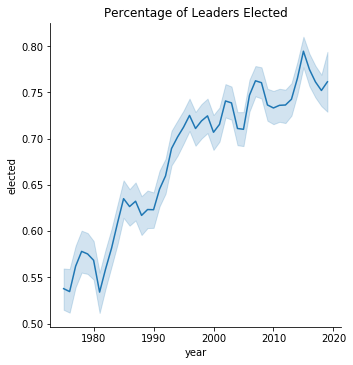

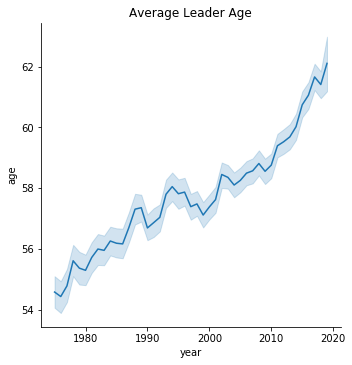

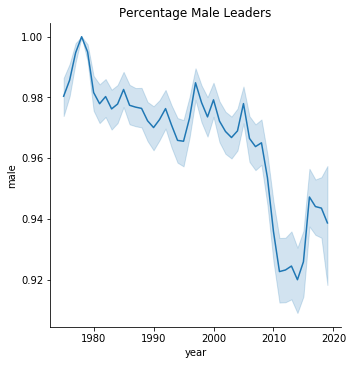

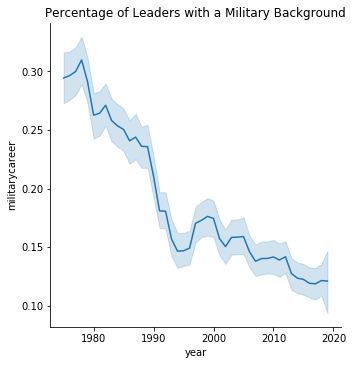

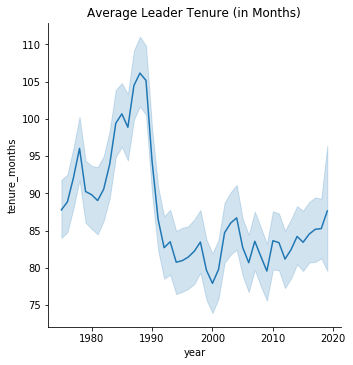

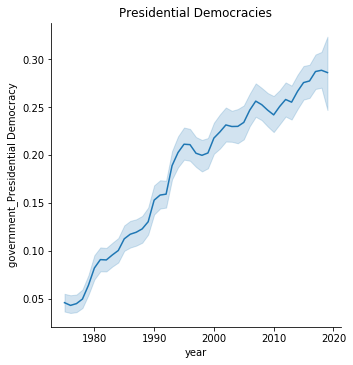

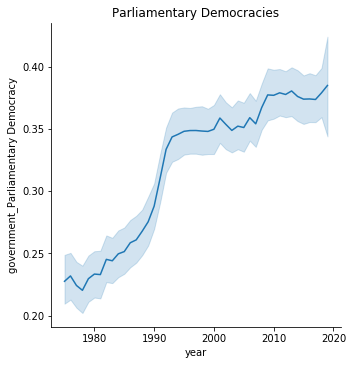

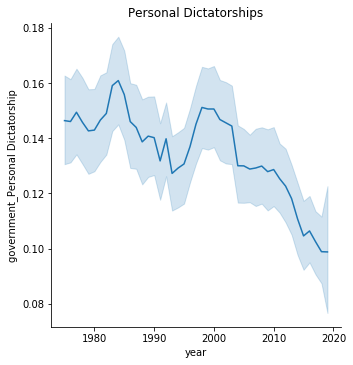

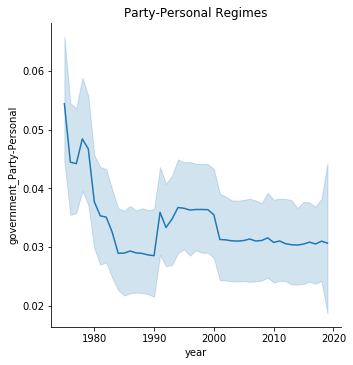

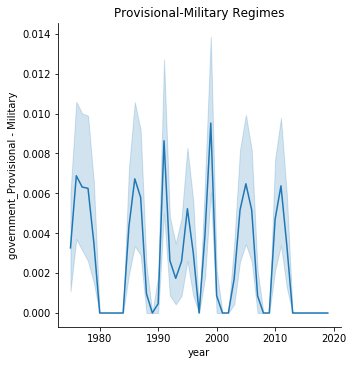

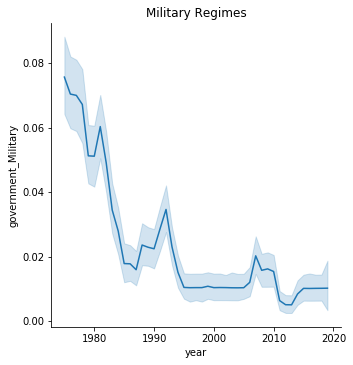

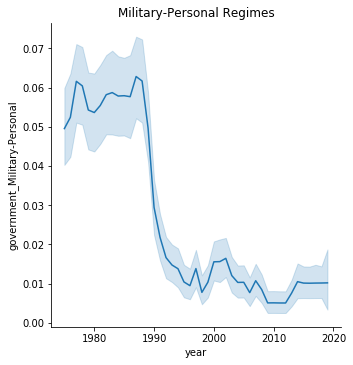

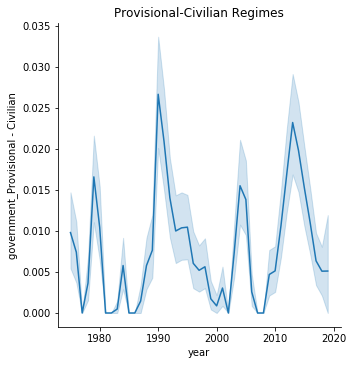

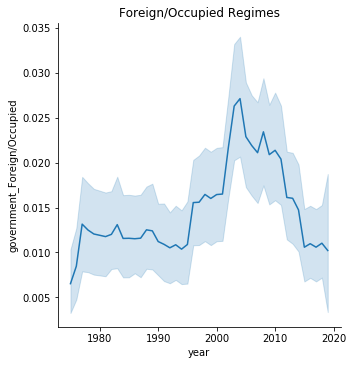

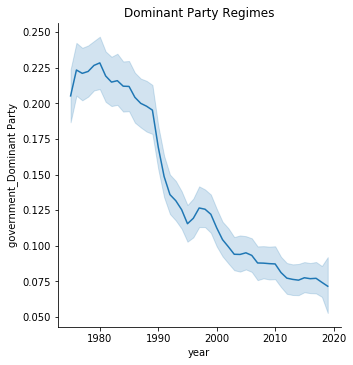

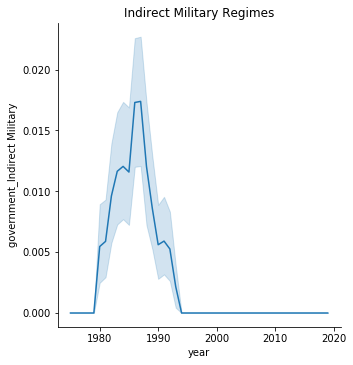

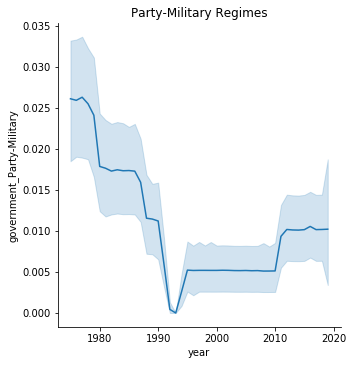

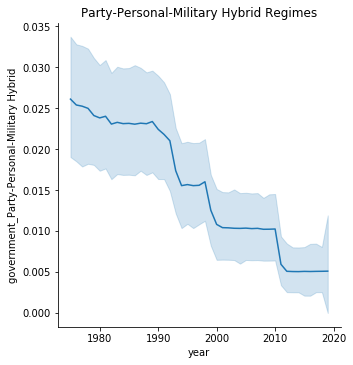

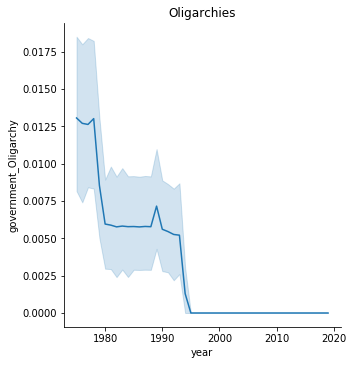

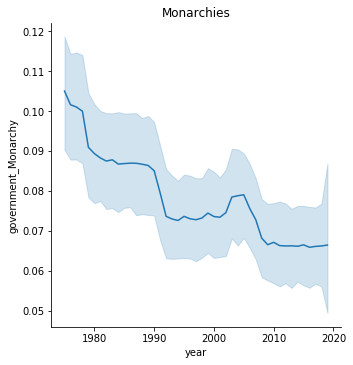

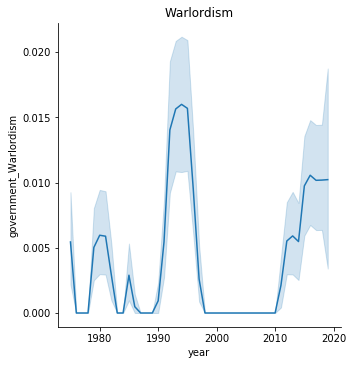

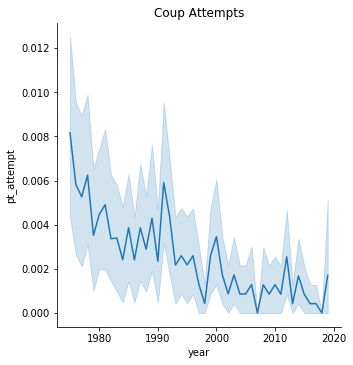

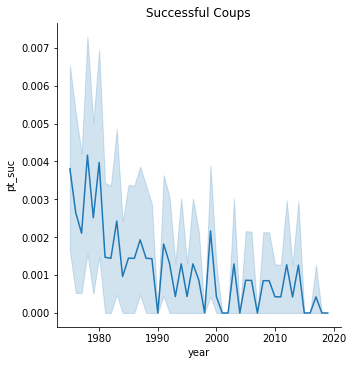

In [143]:
# Visualize 'elected' over time
sns.relplot(x="year", y="elected", kind="line", data=df)
plt.title('Percentage of Leaders Elected')

# Visualize 'age' over time
sns.relplot(x="year", y="age", kind="line", data=df)
plt.title('Average Leader Age')

# Visualise 'male' over time
sns.relplot(x="year", y="male", kind="line", data=df)
plt.title('Percentage Male Leaders')

# Visualise 'militarycareer' over time
sns.relplot(x="year", y="militarycareer", kind="line", data=df)
plt.title('Percentage of Leaders with a Military Background')

# Visualise 'tenure_months' over time
sns.relplot(x="year", y="tenure_months", kind="line", data=df)
plt.title('Average Leader Tenure (in Months)')

# Visualize 'government_Presidential Democracy'
sns.relplot(x="year", y="government_Presidential Democracy", kind="line", data=df)
plt.title('Presidential Democracies')

# Visualize 'government_Parliamentary Democracy'
sns.relplot(x="year", y="government_Parliamentary Democracy", kind="line", data=df)
plt.title('Parliamentary Democracies')

# Visualize 'government_Personal Dictatorship'
sns.relplot(x="year", y="government_Personal Dictatorship", kind="line", data=df)
plt.title('Personal Dictatorships')

# Visualize 'government_Party-Personal'
sns.relplot(x="year", y="government_Party-Personal", kind="line", data=df)
plt.title('Party-Personal Regimes')

# Visualize 'government_Provisional - Military'
sns.relplot(x="year", y="government_Provisional - Military", kind="line", data=df)
plt.title('Provisional-Military Regimes')

# Visualize 'government_Military'
sns.relplot(x="year", y="government_Military", kind="line", data=df)
plt.title('Military Regimes')

# Visualize 'government_Military-Personal'
sns.relplot(x="year", y="government_Military-Personal", kind="line", data=df)
plt.title('Military-Personal Regimes')

# Visualize 'government_Provisional - Civilian'
sns.relplot(x="year", y="government_Provisional - Civilian", kind="line", data=df)
plt.title('Provisional-Civilian Regimes')

# Visualize 'government_Foreign/Occupied'
sns.relplot(x="year", y="government_Foreign/Occupied", kind="line", data=df)
plt.title('Foreign/Occupied Regimes')

# Visualize 'government_Dominant Party'
sns.relplot(x="year", y="government_Dominant Party", kind="line", data=df)
plt.title('Dominant Party Regimes')

# Visualize 'government_Indirect Military'
sns.relplot(x="year", y="government_Indirect Military", kind="line", data=df)
plt.title('Indirect Military Regimes')

# Visualize 'government_Party-Military'
sns.relplot(x="year", y="government_Party-Military", kind="line", data=df)
plt.title('Party-Military Regimes')

# Visualize 'government_Party-Personal-Military Hybrid'
sns.relplot(x="year", y="government_Party-Personal-Military Hybrid", kind="line", data=df)
plt.title('Party-Personal-Military Hybrid Regimes')

# Visualize 'government_Oligarchy'
sns.relplot(x="year", y="government_Oligarchy", kind="line", data=df)
plt.title('Oligarchies')

# Visualize 'government_Monarchy'
sns.relplot(x="year", y="government_Monarchy", kind="line", data=df)
plt.title('Monarchies')

# Visualize 'government_Warlordism'
sns.relplot(x="year", y="government_Warlordism", kind="line", data=df)
plt.title('Warlordism')

# Visualize 'pt_attempt'
sns.relplot(x='year', y='pt_attempt', kind='line', data=df)
plt.title('Coup Attempts')

# Visualize 'pt_suc'
sns.relplot(x='year', y='pt_suc', kind='line', data=df)
plt.title('Successful Coups')

In [144]:
total = len(df)
print('Total Observations: ', total)
print('\n')

attempts = len(df[df['pt_attempt'] == 1])
print('Total Coup Attempts: ', attempts) 
print('\n')

print('Total Coup Attempts as Percentage of Total Observations: ', attempts/total)
print('\n')

successful_attempts = len(df[df['pt_suc'] == 1])
print('Successful Coup Attempts as a Percentage of Total Coup Attempts :', successful_attempts/attempts)

Total Observations:  98010


Total Coup Attempts:  240


Coup Attempts as Percentage of Total Observations:  0.002448729721456994


Successful Coup Attempts as a Percentage of Total Coup Attempts : 0.4583333333333333


## Part 3: Model

In [145]:
# Create variables X and y from the dataset
X = df.drop(columns=['ccode', 'country', 'leader', 'year', 'pt_suc', 'pt_attempt', 'couprisk', 'pctile_risk'])
y = df['pt_attempt']

# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Set an instance of RandomForestClassifier
rfc_1 = RandomForestClassifier()

# Fit the model to the training data
rfc_1.fit(X_train, y_train)

# Predict y values using the model
y_pred = rfc_1.predict(X_test)

# Print the naive accuracy of the model
print('=== Naive Accuracy Score ===')
print(accuracy_score(y_test, y_pred))
print('\n')

# Print Confusion Matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

# Print the Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

# Print mean AUC score and standard deviation
print("=== Mean AUC Score & Standard Deviation ===")
scores = cross_val_score(rfc_1, X, y, cv=5, scoring='roc_auc')
print("%0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))
print('\n')

=== Naive Accuracy Score ===
0.9977213209536442


=== Confusion Matrix ===
[[29335     4]
 [   63     1]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29339
         1.0       0.20      0.02      0.03        64

   micro avg       1.00      1.00      1.00     29403
   macro avg       0.60      0.51      0.51     29403
weighted avg       1.00      1.00      1.00     29403



=== Mean AUC Score & Standard Deviation ===
0.506419 (+/- 0.035559)




In [146]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

# number of features at every split
max_features = ['auto', 'sqrt', 'log2']

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator=rfc_1, 
                                param_distributions=random_grid, 
                                n_jobs=-1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

{'n_estimators': 450, 'max_features': 'auto'}


In [147]:
# Set a new instance of RandomForestClassifier incorporating rfc_random.best_params_
rfc_2 = RandomForestClassifier(n_estimators=rfc_random.best_params_['n_estimators'], 
                               max_features=rfc_random.best_params_['max_features'], 
                               class_weight='balanced_subsample')

# Fit the model to the training data
rfc_2.fit(X_train, y_train)

# Predict y values using the model
y_pred = rfc_2.predict(X_test)

# Print the naive accuracy of the model
print('=== Naive Accuracy Score ===')
print(accuracy_score(y_test, y_pred))
print('\n')

# Print the Confusion Matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

# Print the Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

# Print mean AUC score and standard deviation
print("=== Mean AUC Score & Standard Deviation ===")
scores = cross_val_score(rfc_2, X, y, cv=5, scoring='roc_auc')
print("%0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))
print('\n')

=== Naive Accuracy Score ===
0.9978233513587049


=== Confusion Matrix ===
[[29339     0]
 [   64     0]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29339
         1.0       0.00      0.00      0.00        64

   micro avg       1.00      1.00      1.00     29403
   macro avg       0.50      0.50      0.50     29403
weighted avg       1.00      1.00      1.00     29403



=== Mean AUC Score & Standard Deviation ===
0.576203 (+/- 0.173892)




## Part 4: Results

In [148]:
# Determine the most important features
feature_imp = pd.DataFrame(rfc_2.feature_importances_,
                           index = X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
irregular,0.180821
loss,0.105472
age,0.092128
precip,0.091575
tenure_months,0.091017
lastelection,0.089089
month,0.059387
government_Parliamentary Democracy,0.054002
militarycareer,0.032499
prev_conflict,0.025665


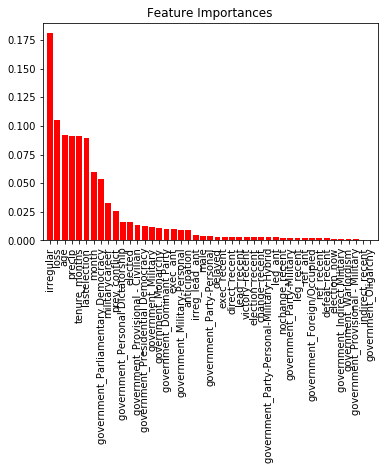

In [149]:
# Plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_imp.values.reshape(1,45)[0],
       color="r", align="center")
plt.title("Feature Importances")
plt.xticks(range(X.shape[1]), feature_imp.index.values, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [150]:
# Select a subset of the data containing only the most recent year-month
df = df[df['year'] == max(df['year'].values)]
df = df[df['month'] == max(df['month'].values)]
df = df.set_index(df['country'])

# Create variables X and y from the dataset
X = df.drop(columns=['ccode', 'country', 'leader', 'year', 'pt_suc', 'pt_attempt', 'couprisk', 'pctile_risk'])

# Extract the predicted class probabilities
predict_proba = rfc_2.predict_proba(X)

# Convert predict_proba to a DataFrame
predict_proba = pd.DataFrame(predict_proba[:,1], columns=['predict_proba'])

# Modify predict_proba to set the index equal to country
results = predict_proba.set_index(df['country'].values)

# Sort results from highest predict_proba to lowest predict_proba
results.sort_values(by=['predict_proba'], ascending=False)

,predict_proba
Kyrgyzstan,0.024444
Equatorial Guinea,0.022222
Burkina Faso,0.015556
Malta,0.013333
Portugal,0.011111
Turkey,0.011111
Cuba,0.011111
Senegal,0.008889
Korea South,0.008889
Congo-Brz,0.006667


In [151]:
# Reset our data
df = raw_data

# Select a subset of the reset data where pt_attempt == 1 (i.e. attempted coups only)
df = df[df['pt_attempt'] == 1]

# Remove missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Apply one-hot-encoding to government feature
df = pd.get_dummies(df, columns=['government'])

# Create X and y variables
X = df.drop(columns=['ccode', 'country', 'leader', 'year', 'pt_suc', 'pt_attempt', 'couprisk', 'pctile_risk'])
y = df['pt_suc']

# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the model to the training data
rfc_2.fit(X_train, y_train)

# Predict y values using the model
y_pred = rfc_2.predict(X_test)

# Print the naive accuracy of the model
print('=== Naive Accuracy Score ===')
print(accuracy_score(y_test, y_pred))
print('\n')

# Print the Confusion Matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

#Print the Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

# Print the mean AUC score and standard deviation
print("=== Mean AUC Score & Standard Deviation ===")
scores = cross_val_score(rfc_2, X, y, cv=5, scoring='roc_auc')
print("%0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))
print('\n')

=== Naive Accuracy Score ===
0.4305555555555556


=== Confusion Matrix ===
[[25  8]
 [33  6]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55        33
         1.0       0.43      0.15      0.23        39

   micro avg       0.43      0.43      0.43        72
   macro avg       0.43      0.46      0.39        72
weighted avg       0.43      0.43      0.37        72



=== Mean AUC Score & Standard Deviation ===
0.518182 (+/- 0.153055)




In [152]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

# number of features at every split
max_features = ['auto', 'sqrt', 'log2']

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator=rfc_1, 
                                param_distributions=random_grid, 
                                n_jobs=-1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

{'n_estimators': 120, 'max_features': 'sqrt'}


In [153]:
# Set a new instance of RandomForestClassifier incorporating rfc_random.best_params_
rfc_3 = RandomForestClassifier(n_estimators=rfc_random.best_params_['n_estimators'], 
                               max_features=rfc_random.best_params_['max_features'], 
                               class_weight='balanced_subsample')

# Fit the model to the training data
rfc_3.fit(X_train, y_train)

# Predict y values using the model
y_pred = rfc_3.predict(X_test)

# Print the naive accuracy of the model
print('=== Naive Accuracy Score ===')
print(accuracy_score(y_test, y_pred))
print('\n')

# Print the Confusion Matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

# Print the Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

# Print mean AUC score and standard deviation
print("=== Mean AUC Score & Standard Deviation ===")
scores = cross_val_score(rfc_3, X, y, cv=5, scoring='roc_auc')
print("%0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))
print('\n')

=== Naive Accuracy Score ===
0.4305555555555556


=== Confusion Matrix ===
[[23 10]
 [31  8]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.43      0.70      0.53        33
         1.0       0.44      0.21      0.28        39

   micro avg       0.43      0.43      0.43        72
   macro avg       0.44      0.45      0.40        72
weighted avg       0.44      0.43      0.39        72



=== Mean AUC Score & Standard Deviation ===
0.501049 (+/- 0.111825)




In [154]:
# Determine the most important features
feature_imp = pd.DataFrame(rfc_3.feature_importances_,
                           index = X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
tenure_months,0.123566
age,0.119425
loss,0.109509
precip,0.104443
irregular,0.102633
lastelection,0.102036
month,0.066598
prev_conflict,0.024216
government_Military,0.022613
elected,0.022093


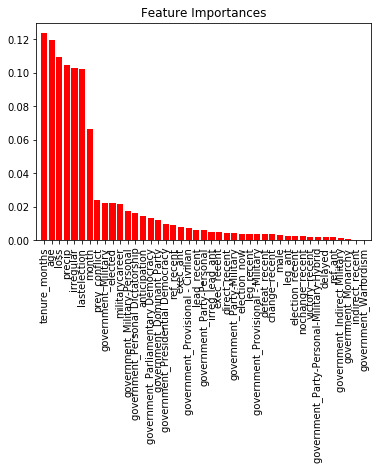

In [155]:
# Plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_imp.values.reshape(1,43)[0],
       color="r", align="center")
plt.title("Feature Importances")
plt.xticks(range(X.shape[1]), feature_imp.index.values, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()